In [1]:
import requests
import pandas as pd
import math
import numpy as np
import requests
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt

In [32]:
%pip install ascii_magic
import ascii_magic

Note: you may need to restart the kernel to use updated packages.


                                                                                
                  0RMMR0                                                        
              RB$YYXSSSdGbO@N                                                   
            $3gXEEX4Fpqhp5556GUD                                                
          0XL77FGggP6gVpF6666mnn3g$BKR                                          
          Y7zjzjwmEZh6F6Ff#u6njjz7jCShbD                                        
          k7777uJFZUPghJLjJ6Jjjjjjz6q6qdA&R                                     
          0Z#SXO8U888$kEggGPnzjjjj#VgS63yyPM                                    
            NM@8&88888GXXXXPgCujjj6dVyy333y6ZB           M@KM                   
              RB$&88$kGPPXXXPGSzjCdd5y333yy33dUR  RB@DH&bAH8D                   
                0B8UkGG4hEPGPPg5pqhEpF232mgggX4A Hb$K@&XE8R                     
                 Dk&Y5w#uL#pqTpEgbk&AAbbOObPEEEEYX$    NBN                      
                MPggZYAAkXC7

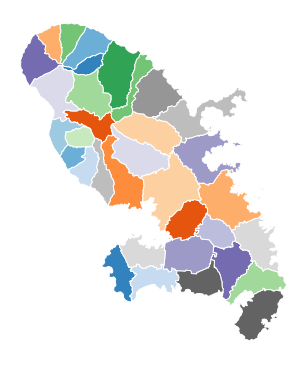

In [200]:
reload = False
COMMUNES_FILES = 'data/communes-martinique.geojson'
gdf = gpd.read_file(COMMUNES_FILES)
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 5))

gdf.plot(ax=ax, edgecolor='white', column='nom', cmap='tab20c')
_ = ax.axis('off')

plt.savefig('output-tmp/2022-11-16.png', facecolor='white')

mq_ascii_art = ascii_magic.from_image_file('output-tmp/2022-11-16.png', columns=80).replace('Q', ' ')
print(mq_ascii_art)

with open('output/2022-11-16.txt', 'w') as o: o.write(mq_ascii_art + "\n")

In [62]:
%pip install topojson

     l     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/82.4 kB ? eta -:--:--━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 41.0/82.4 kB 950.8 kB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.4/82.4 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


1
2
4
8
16
32
64
128
256
512
1024
2048
4096


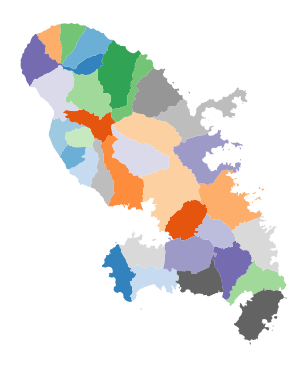

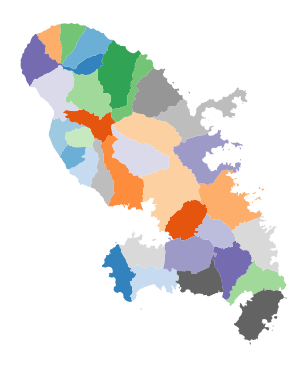

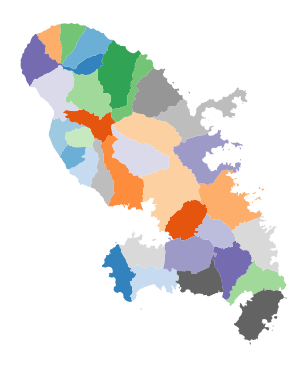

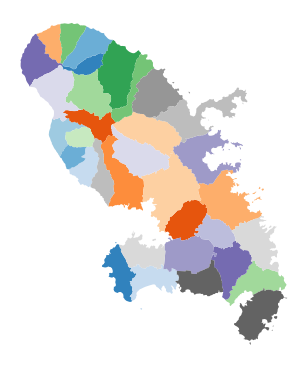

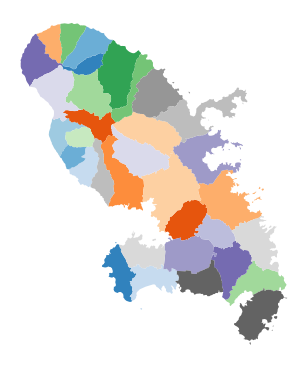

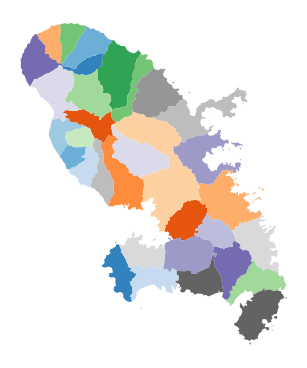

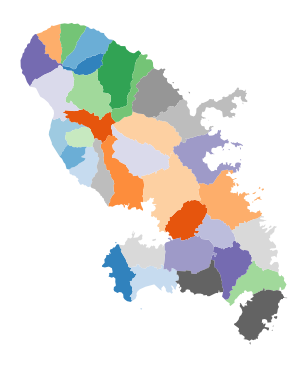

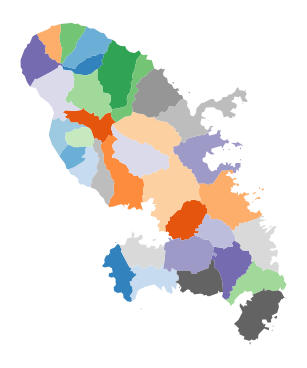

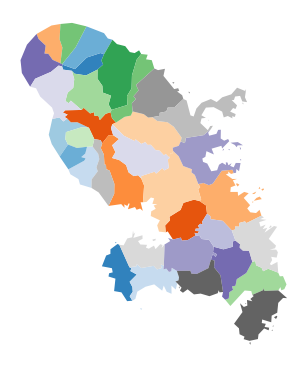

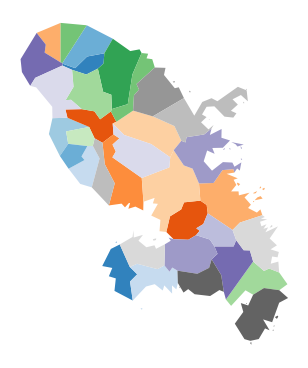

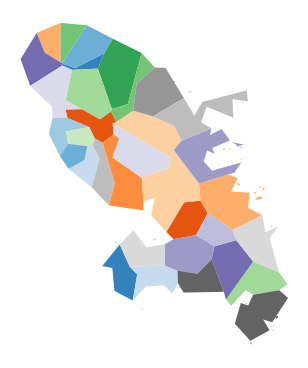

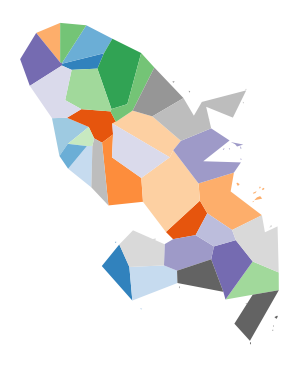

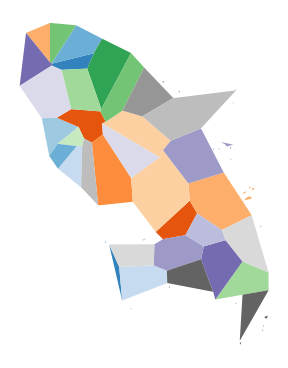

In [190]:
gdf_origin = gpd.read_file(COMMUNES_FILES)

for i in range(13):
    n = 2 ** i
    print(n)
    gdf = gdf_origin.copy()
    topo = tp.Topology(gdf.to_crs('epsg:3857'), prequantize=True)
    gdf['geometry'] = topo.toposimplify(n).to_gdf().geometry
    
    fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 5))
    gdf.plot(ax=ax, column='nom', cmap='tab20c')
    _ = ax.axis('off')
    plt.savefig(f'output-tmp/2022-11-16-a-{i}.png', facecolor='white')

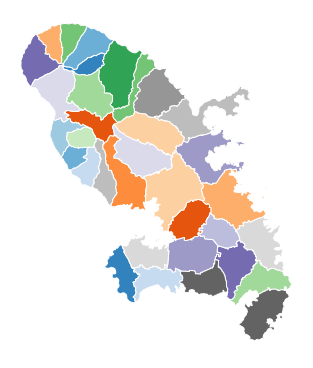

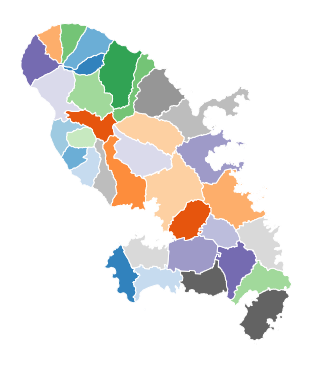

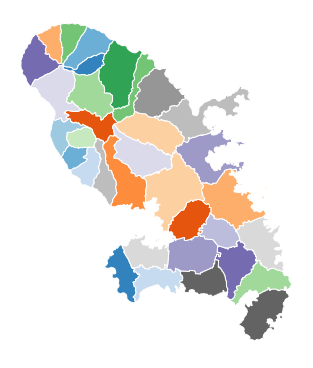

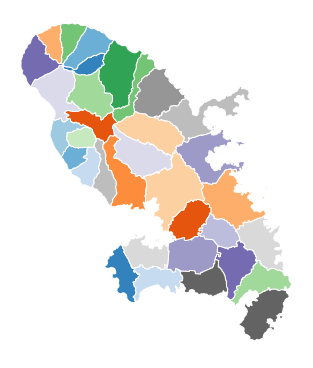

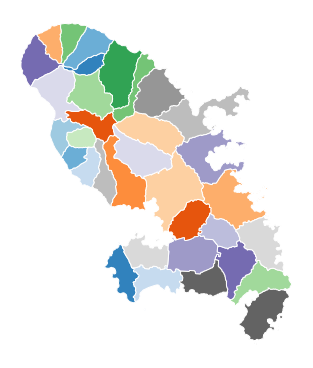

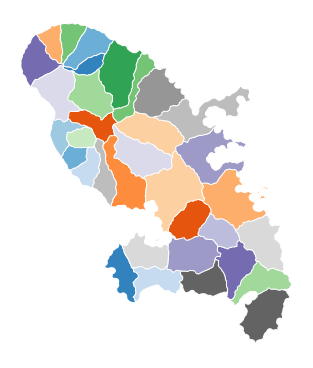

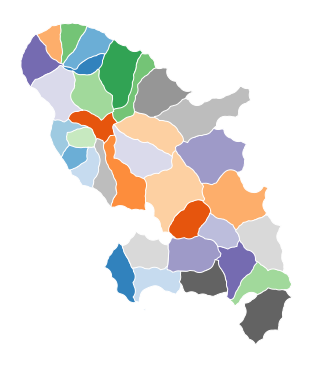

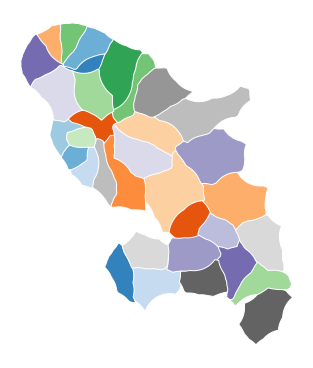

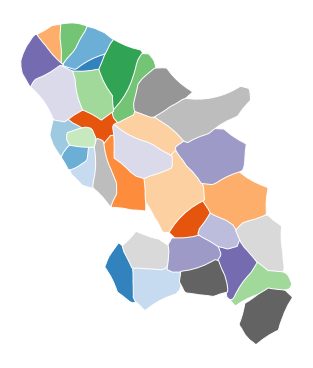

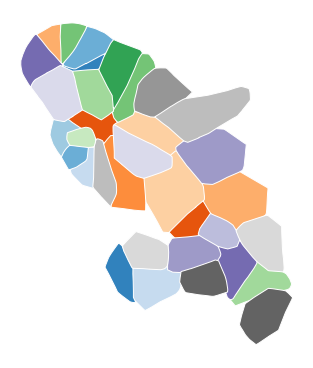

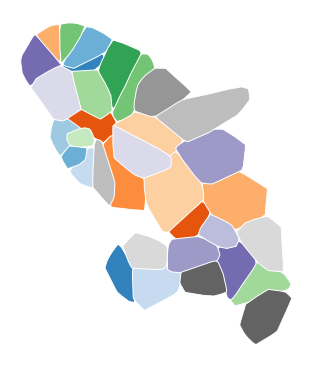

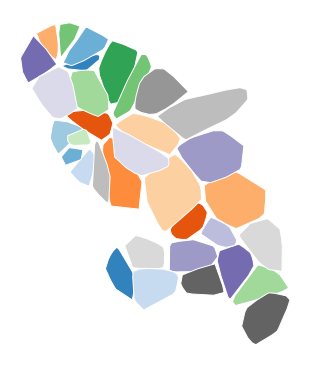

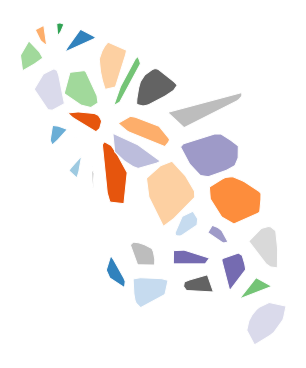

In [191]:
gdf_origin = gpd.read_file(COMMUNES_FILES).to_crs('epsg:2973')

for i in range(13):
    n = 2 * 3 ** i
    fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 5))

    gdf = gdf_origin.copy()
    gdf['geometry'] = gdf.buffer(n, join_style=1).buffer(-n, join_style=1)
    gdf.plot(ax=ax, edgecolor='white', column='nom', cmap='tab20c')
    _ = ax.axis('off')

    plt.savefig(f'output-tmp/2022-11-16-b-{i}.png', facecolor='white')

In [195]:
import numpy as np
import cv2

for i in range(13):
    im_A = cv2.imread(f'output-tmp/2022-11-16-a-{i}.png', 1) # python2: cv2.CV_LOAD_IMAGE_COLOR; python3: cv2.IMREAD_COLOR
    im_B = cv2.imread(f'output-tmp/2022-11-16-b-{i}.png', 1) # python2: cv2.CV_LOAD_IMAGE_COLOR; python3: cv2.IMREAD_COLOR
    im_AB = np.concatenate([im_A, im_B], 1)
    cv2.imwrite(f'output-tmp/2022-11-16-both-{i}.png', im_AB)

In [198]:
!convert -delay 50 -loop 0 output-tmp/2022-11-16-both-*.png output/2022-11-16.gif